In [10]:
!pip install pandas numpy matplotlib yfinance PyPortfolioOpt
import os
if not os.path.isdir('data'):
    os.system('git clone https://github.com/robertmartin8/PyPortfolioOpt.git')
    os.chdir('PyPortfolioOpt/cookbook')

fatal: destination path 'PyPortfolioOpt' already exists and is not an empty directory.


In [11]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import hvplot.pandas
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import  risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [12]:
tickers = ["TSLA", "BIDU", "NVDA", "AAL", "PYPL", "UBER", "DIS", "DHR", "PANW","FWONK","MCL.CN","FI"]

In [13]:
ohlc = yf.download(tickers, period="max")

[*********************100%%**********************]  12 of 12 completed


In [14]:
prices = ohlc["Adj Close"].dropna(how="all")
prices.tail()

,AAL,BIDU,DHR,DIS,FI,FWONK,MCL.CN,NVDA,PANW,PYPL,TSLA,UBER
Date,,,,,,,,,,,,
2023-10-31,11.15,105.000000,192.020004,81.589996,113.750000,64.690002,0.065,407.799988,243.020004,51.799999,200.839996,43.279999
2023-11-01,11.14,104.970001,190.000000,81.070000,114.930000,64.910004,0.070,423.250000,244.860001,51.660000,205.660004,43.830002
2023-11-02,11.40,107.050003,192.979996,83.290001,117.809998,65.690002,0.075,435.059998,250.360001,55.060001,218.509995,46.480000
2023-11-03,11.98,109.660004,197.869995,85.070000,119.540001,65.230003,0.075,450.049988,243.529999,56.099998,219.960007,47.750000
2023-11-06,11.66,108.400002,195.520004,84.019997,119.639999,64.980003,NaN,457.510010,237.000000,54.619999,219.270004,48.139999


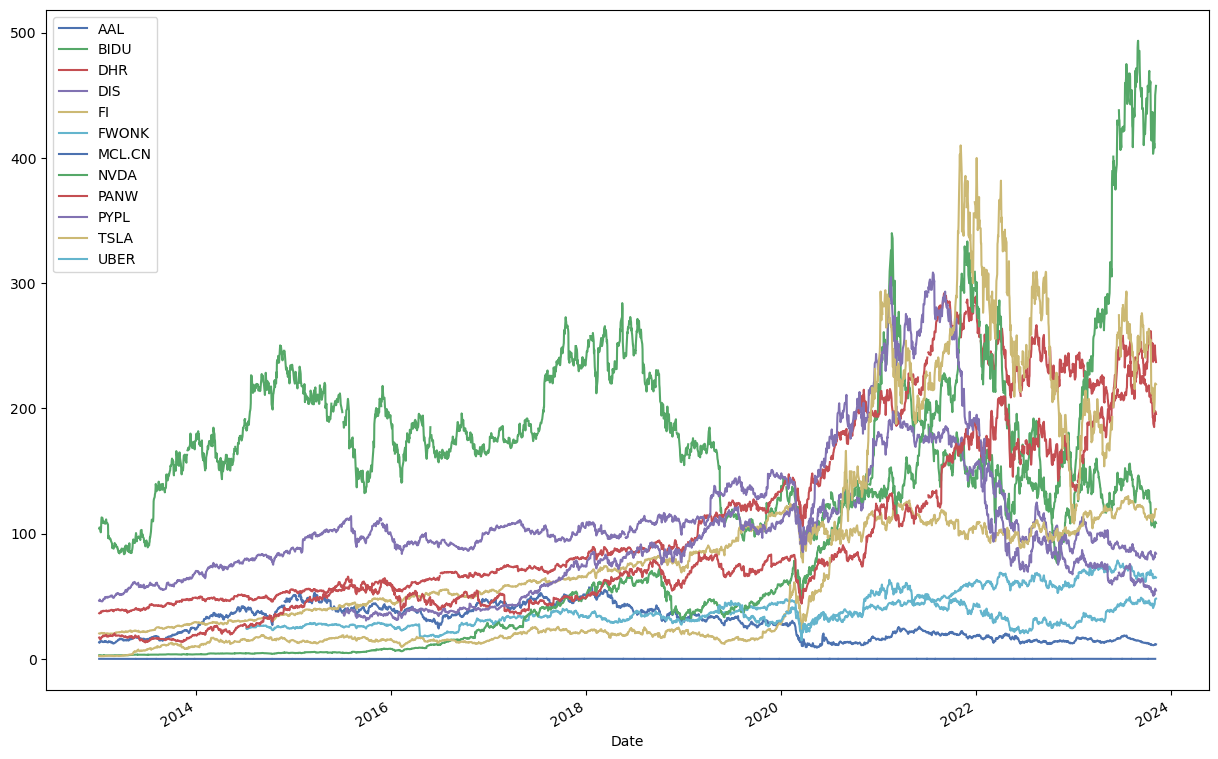

In [15]:
prices[prices.index >= "2013-01-01"].plot(figsize=(15,10));

In [16]:
sample_cov = risk_models.sample_cov(prices, frequency=252)
sample_cov

,AAL,BIDU,DHR,DIS,FI,FWONK,MCL.CN,NVDA,PANW,PYPL,TSLA,UBER
AAL,0.435363,0.079388,0.053193,0.076288,0.058994,0.053310,-0.010270,0.092583,0.042536,0.055566,0.065168,0.137315
BIDU,0.079388,0.259840,0.044858,0.050260,0.044094,0.039840,0.000281,0.090637,0.046673,0.067613,0.074681,0.115345
DHR,0.053193,0.044858,0.119537,0.032219,0.029547,0.025686,0.005220,0.052076,0.029572,0.043114,0.037883,0.049636
DIS,0.076288,0.050260,0.032219,0.099114,0.032994,0.039816,0.002538,0.064098,0.033804,0.048091,0.043193,0.089706
FI,0.058994,0.044094,0.029547,0.032994,0.110031,0.036884,-0.002768,0.065074,0.029643,0.051766,0.039826,0.075332
FWONK,0.053310,0.039840,0.025686,0.039816,0.036884,0.118779,-0.001084,0.054673,0.040162,0.045242,0.051253,0.087169
MCL.CN,-0.010270,0.000281,0.005220,0.002538,-0.002768,-0.001084,4.564551,0.002344,-0.006453,0.005866,-0.009163,0.028803
NVDA,0.092583,0.090637,0.052076,0.064098,0.065074,0.054673,0.002344,0.361224,0.065028,0.095971,0.094024,0.136906
PANW,0.042536,0.046673,0.029572,0.033804,0.029643,0.040162,-0.006453,0.065028,0.149382,0.063036,0.070398,0.090610
PYPL,0.055566,0.067613,0.043114,0.048091,0.051766,0.045242,0.005866,0.095971,0.063036,0.146587,0.088958,0.118317


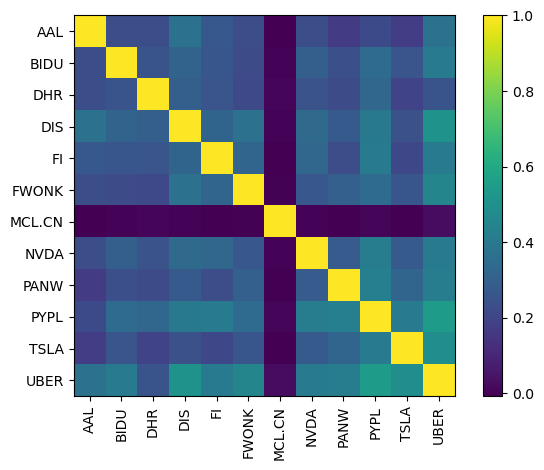

In [17]:
plotting.plot_covariance(sample_cov, plot_correlation=True);

In [18]:
mu = expected_returns.capm_return(prices)
mu

AAL       0.296687
BIDU      0.222610
DHR       0.178169
DIS       0.188031
FI        0.152763
FWONK     0.127945
MCL.CN    1.109388
NVDA      0.319270
PANW      0.139011
PYPL      0.173160
TSLA      0.205614
UBER      0.291266
Name: mkt, dtype: float64

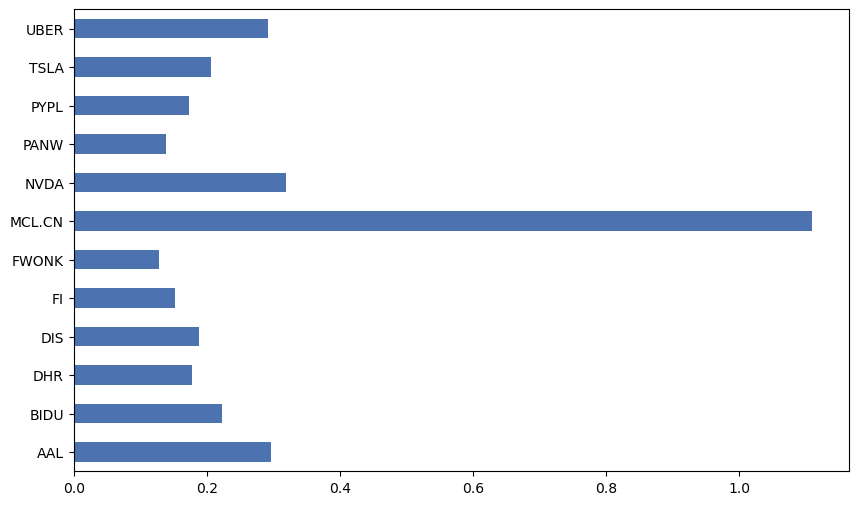

In [19]:
mu.plot.barh(figsize=(10,6));

Portfolio Allocation


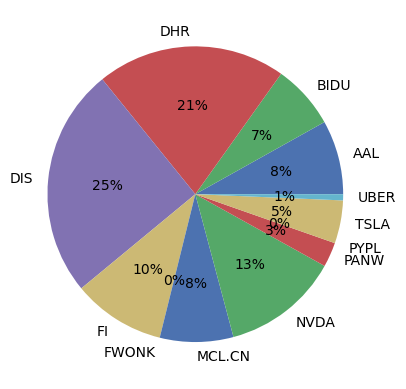

OrderedDict([('AAL', 0.08111),
             ('BIDU', 0.07033),
             ('DHR', 0.20687),
             ('DIS', 0.25159),
             ('FI', 0.1014),
             ('FWONK', 0.0),
             ('MCL.CN', 0.08029),
             ('NVDA', 0.12779),
             ('PANW', 0.02694),
             ('PYPL', 0.0),
             ('TSLA', 0.04698),
             ('UBER', 0.00671)])

In [20]:
ef = EfficientFrontier(mu,sample_cov)
weights = ef.max_sharpe() #for maximizing the Sharpe ratio #Optimization
cleaned_weights = ef.clean_weights() #to clean the raw weights
# Get the Keys and store them in a list
labels = list(cleaned_weights.keys())
# Get the Values and store them in a list
values = list(cleaned_weights.values())
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.0f%%')
print('Portfolio Allocation')
plt.show(fig)
cleaned_weights

In [21]:
idx = pd.date_range("1/1/2023", periods=1000)

df = pd.DataFrame(
    np.random.randn(1000, 12), index=idx, columns=("TSLA", "BIDU", "NVDA", "AAL", "PYPL", "UBER", "DIS", "DHR", "PANW","FWONK","MCL.CN","FI")
    ).pct_change().dropna(how="all")
df

,TSLA,BIDU,NVDA,AAL,PYPL,UBER,DIS,DHR,PANW,FWONK,MCL.CN,FI
2023-01-02,-3.295142,1.666417,0.263548,0.808383,4.432341,-2.182798,1.097867,-1.355699,1.465439,-0.826362,-3.596786,17.949014
2023-01-03,-0.869917,-1.351417,-1.637442,-1.292497,-1.405722,-0.414007,-2.135625,7.364079,-0.840382,-10.298267,-0.204407,-1.073485
2023-01-04,-2.856432,-1.453308,-1.122505,-1.961854,-2.341860,-2.333017,-1.675343,-1.478035,-7.361370,-1.124840,0.892276,4.488548
2023-01-05,-1.988167,1.278221,-1.078123,2.596242,0.232144,1.366351,-1.534908,0.852534,-2.071206,4.153697,-1.257883,-0.659455
2023-01-06,-4.396015,1.131758,175.197584,-2.864371,1.570655,-0.271110,1.827004,-1.149787,-1.211541,-1.137944,3.259694,0.890527
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-22,-4.415381,0.390222,-3.152581,0.715979,0.910262,0.686983,-21.947274,-0.258383,-2.056170,-2.329885,-0.607520,5.495928
2025-09-23,-0.198047,-2.272233,-0.565067,-0.466919,-2.417866,-0.316644,-1.436633,0.535495,-1.361521,-4.805050,-2.275713,3.033023
2025-09-24,-0.520385,-2.437320,-0.574893,-0.423454,-1.574594,-0.196978,-0.751256,-1.730862,0.499965,-1.050579,1.597014,-1.372786
2025-09-25,-0.260884,-1.518642,1.731155,0.010017,-0.013170,-3.185842,2.145699,-0.997315,0.836605,34.671281,-0.526748,-0.234936


In [22]:
df.hvplot.line(
    xlabel="Year", 
    ylabel="Daily Return"
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [23]:
idx = pd.date_range("1/1/2023", periods=1000)

df_cumsum = pd.DataFrame(np.random.randn(1000, 12), index=idx, columns=("TSLA", "BIDU", "NVDA", "AAL", "PYPL", "UBER", "DIS", "DHR", "PANW","FWONK","MCL.CN","FI")).cumsum()

# Visualize the cumulative sum using a line plot
# Like the plot function, hvPlot will select the plot that best displays the data
df_cumsum.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [24]:
df_bar = pd.DataFrame(
    {
        "ticker": ["TSLA", "BIDU", "NVDA", "AAL", "PYPL", "UBER", "DIS", "DHR", "PANW","FWONK","MCL.CN","FI"],
        "daily_return": (4.50, 10, 33.0, 55.25, 25, 30, 55, 89, 92, 49, 15, 19),
    }
)

In [25]:
# Use hvplot.bar to create bar plot with categorical data
df_bar.hvplot.bar(
    x="ticker", 
    y="daily_return", 
    xlabel="Ticker", 
    ylabel="Daily Return", 
    rot=90
)

:Bars   [ticker]   (daily_return)